In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('C:\\Users\\Алматы\\Desktop\\DS\\telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape #churned-stopped using service

(3333, 21)

In [4]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Whole dataset visualizations

In [5]:
df['international plan']=df['international plan'].map({'yes':1,'no':0})
df['voice mail plan']=df['voice mail plan'].map({'yes':1,'no':0})


In [6]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
df['churn']=df['churn'].astype('int')

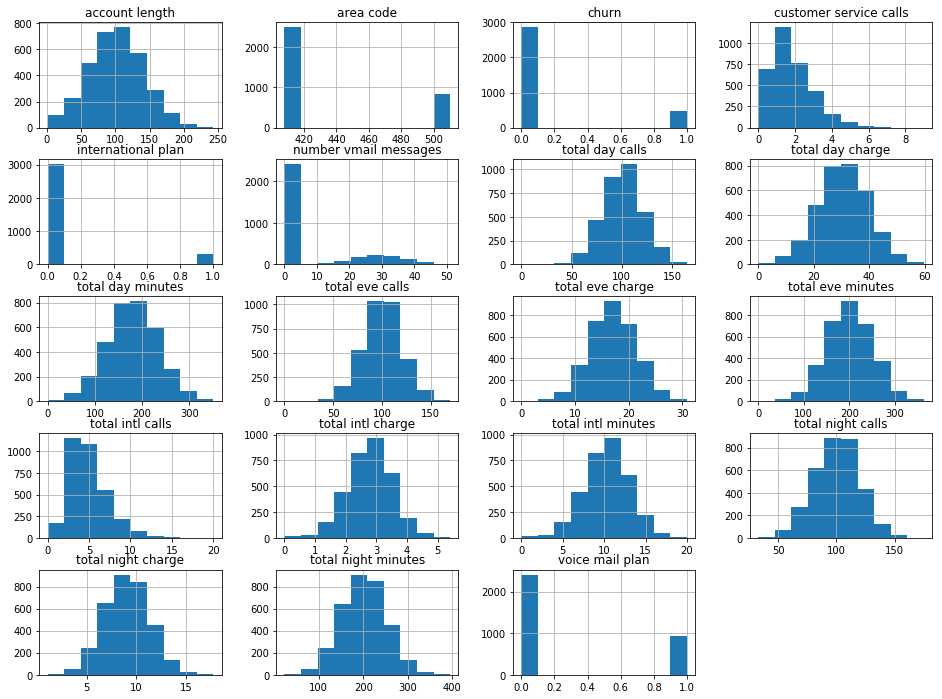

In [8]:
plt.rcParams['figure.figsize']=(16,12)
df.drop(['state'],axis=1).hist();

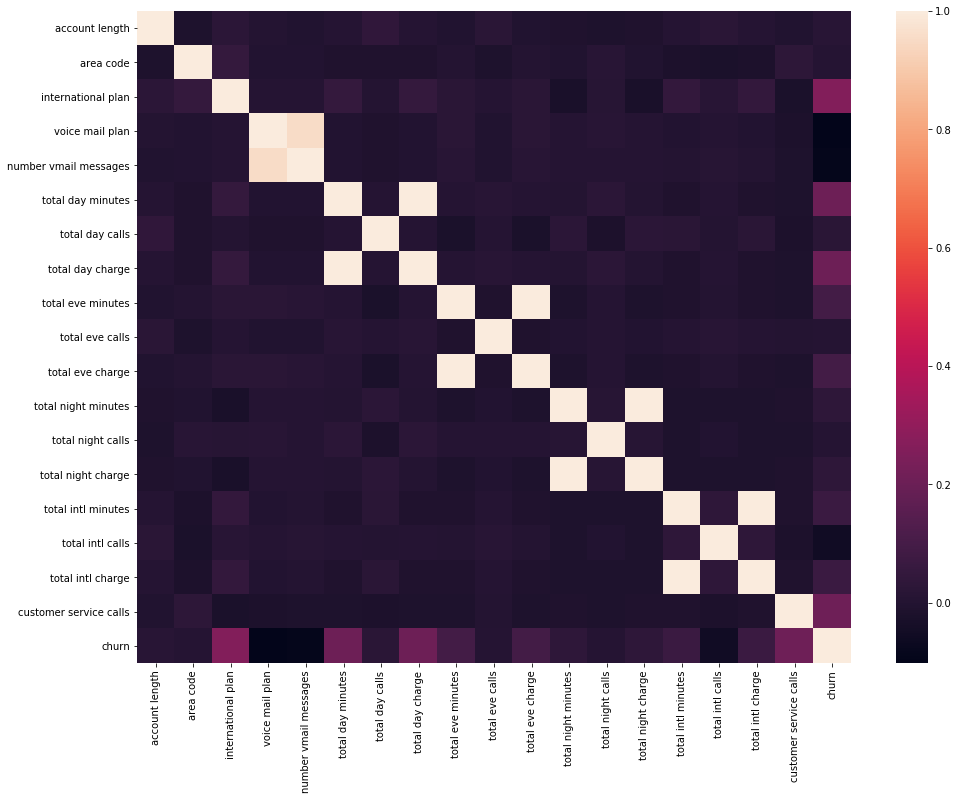

In [9]:
sns.heatmap(df.corr())

In [10]:
#charge=расходы сколько потратили на звонок


In [11]:
df.drop([feat_name for feat_name in df.columns
if 'charge' in feat_name],axis=1,inplace=True)

In [12]:
df.shape

(3333, 17)

# tSNE= t-distributed Stochastic Neighbor Embedding


In [13]:
from sklearn.manifold import TSNE

In [14]:
state=df['state']

In [15]:
df.drop('state',axis=1,inplace=True)

In [16]:
df.drop('phone number',axis=1,inplace=True)

In [17]:
tsne=TSNE(random_state=17)

In [25]:

X_repr=tsne.fit_transform(df)


In [27]:
X_repr.shape

(3333, 2)

Text(0.5, 1.0, 'tSNE represantation')

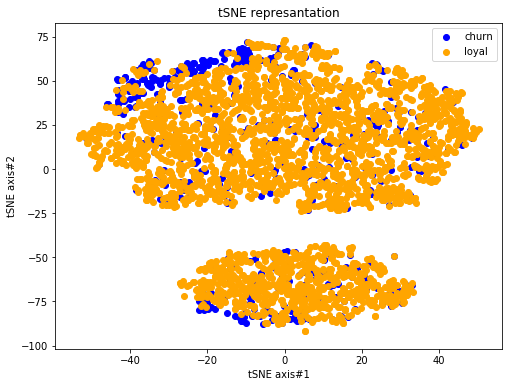

In [61]:
plt.rcParams['figure.figsize']=(8,6)
plt.scatter(X_repr[df['churn']==1,0],X_repr[df['churn']==1,1],c='blue',label='churn')
plt.scatter(X_repr[df['churn']==0,0],X_repr[df['churn']==0,1],c='orange',label='loyal')
plt.xlabel('tSNE axis#1')
plt.ylabel('tSNE axis#2')
plt.legend()
plt.title('tSNE represantation')
#plt.savefig('churn_tsne.png',dpi=300)

## Features one at a time (Numeric)

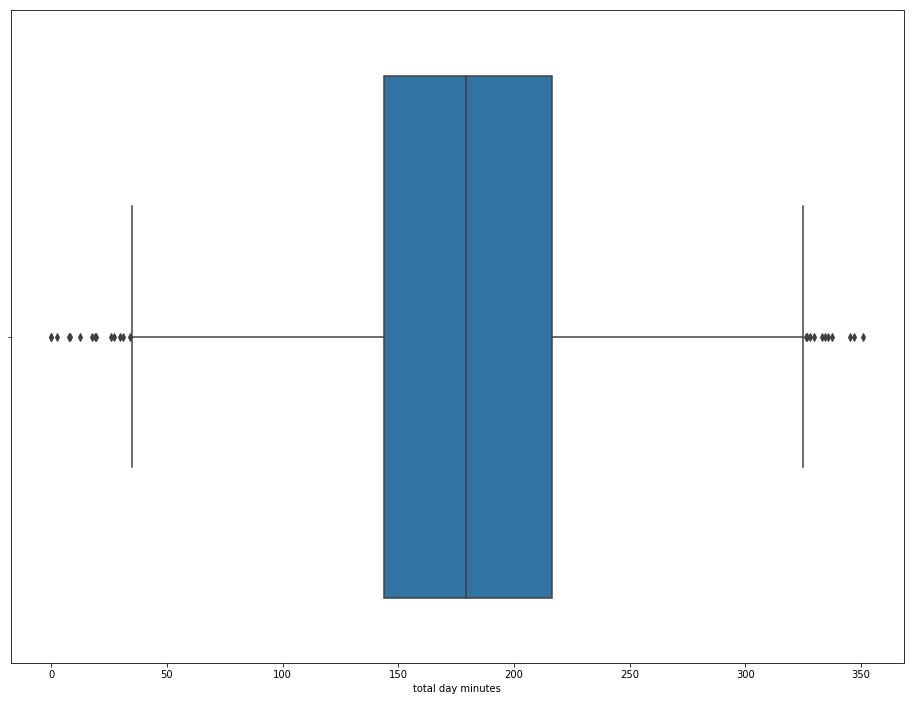

In [20]:
sns.boxplot(x='total day minutes',data=df)

In [51]:
df.columns

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'customer service calls', 'churn'],
      dtype='object')

Categorical

In [63]:
df['state'].nunique()

51

In [64]:
df['state'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: state, dtype: int64

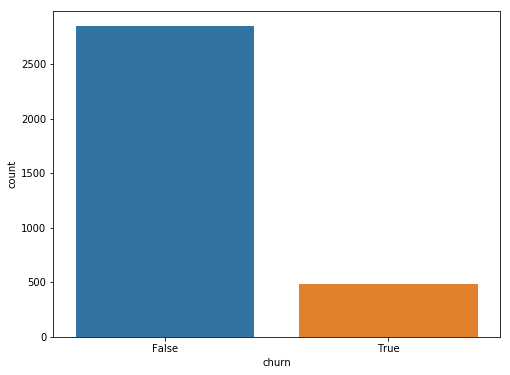

In [65]:
sns.countplot(x='churn',data=df)

Interaction between features(numeric-numeric)

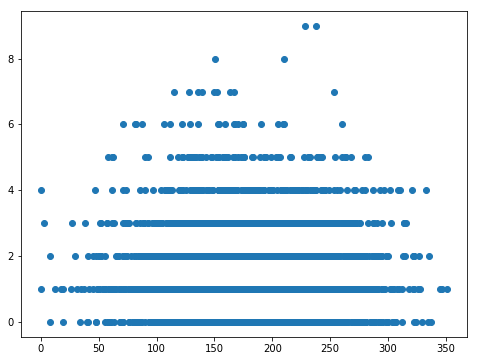

In [66]:
plt.scatter(df['total day minutes'],df['customer service calls']); #x=total day minutes,y=customer service calls

In [67]:
state=df['state']
df.drop('state',axis=1,inplace=True)

In [54]:
df.corrwith(df['total day minutes'])

account length            0.006216
area code                -0.008264
international plan        0.049396
voice mail plan          -0.001684
number vmail messages     0.000778
total day minutes         1.000000
total day calls           0.006750
total eve minutes         0.007043
total eve calls           0.015769
total night minutes       0.004323
total night calls         0.022972
total intl minutes       -0.010155
total intl calls          0.008033
customer service calls   -0.013423
churn                     0.205151
dtype: float64

Categorical-categorical

In [55]:
pd.crosstab(df['churn'],df['customer service calls'])

customer service calls,0,1,2,3,4,5,6,7,8,9
churn,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0
1,92,122,87,44,76,40,14,5,1,2


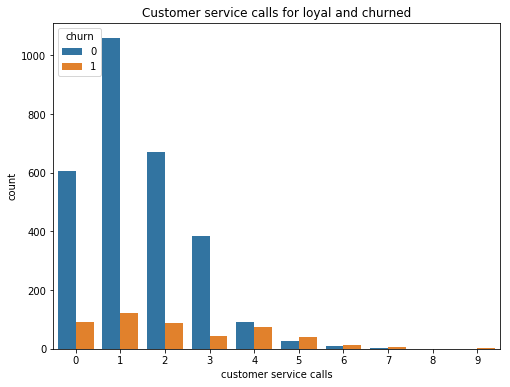

In [56]:
sns.countplot(x='customer service calls',hue='churn',data=df);
plt.title('Customer service calls for loyal and churned');

### Categorical-numeric

In [57]:
import numpy as np

In [58]:
df.groupby('churn')['total day minutes','customer service calls'].mean()

,total day minutes,customer service calls
churn,,
0,175.175754,1.449825
1,206.914079,2.229814


In [59]:
df.groupby('churn')['total day minutes','customer service calls'].agg([np.median,np.std])

total day minutes            customer service calls          
                 median        std                 median       std
churn                                                              
0                 177.2  50.181655                      1  1.163883
1                 217.6  68.997792                      2  1.853275

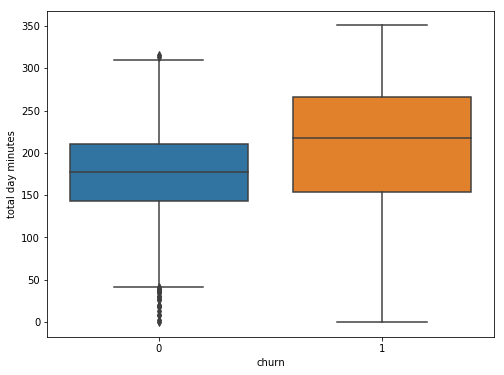

In [60]:
sns.boxplot(x='churn',y='total day minutes',data=df)